<a href="https://colab.research.google.com/github/CJain2004/SPAMA-Algo---Classical-Heart-rate-detection-RnD-Project/blob/main/SPAMA_algorithm_PPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
!pip install scipy

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()


In [ ]:
!pip install pyPPG==1.0.41


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 10.8 MB/s e

In [ ]:
from pyPPG import PPG, Fiducials, Biomarkers
from pyPPG.datahandling import load_data, plot_fiducials, save_data
import pyPPG.preproc as PP
import pyPPG.fiducials as FP
import pyPPG.biomarkers as BM
import pyPPG.ppg_sqi as SQI


# Analyzing ppg signal

In [ ]:
data_path = "/content/ppg_column.csv" # the path of the file containing the PPG signal to be analysed
start_sig = 0 # the first sample of the signal to be analysed
end_sig = -1 # the last sample of the signal to be analysed (here a value of '-1' indicates the last sample)
savingfolder = 'temp_dir'
savingformat = 'csv'

signal_ppg = load_data(data_path=data_path, start_sig=start_sig, end_sig=end_sig, use_tk=False)
signal_ppg.fs=64
signal_ppg.v = signal_ppg.v[0*signal_ppg.fs:]  # This captures the entire duration of the signal
ppg_signal=signal_ppg.v
ppg_signal=ppg_signal/ppg_signal.max()

In [ ]:
import numpy as np
from scipy import signal

# Define original and target sampling rates
original_rate_ppg = 64  # Hz
target_rate_ppg = 32  # Hz

# Define the decimation factor
decimation_factor_ppg = original_rate_ppg / target_rate_ppg

# Interpolate the data to achieve downsampling
downsampled_data_ppg = signal.resample(ppg_signal, int(len(ppg_signal) / decimation_factor_ppg))

# Resulting data will be downsampled to 20 Hz
print("Original data length:", len(ppg_signal))
print("Downsampled data length:", len(downsampled_data_ppg))


Original data length: 589567
Downsampled data length: 294783


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft, hann

# Sample signal (replace this with your actual signal)
# Example signal with random values
# signal = np.random.randn(1000)

# Sampling frequency
sampling_freq = 32  # Hz

# Parameters for STFT
nperseg = 256  # Length of each segment (you can adjust this based on your signal)
noverlap = 192  # no of Overlap between segments (you can adjust this based on your signal)
# nfft = 1024  # FFT length, ensuring it's at least as large as nperseg

# Compute the Hann window segment-wise
window = hann(nperseg, sym=False)

# Compute STFT with Hann window applied
f, t, Zxx = stft(downsampled_data_ppg, fs=sampling_freq, nperseg=nperseg,noverlap=noverlap)
max_indices = np.argsort(np.abs(Zxx), axis=0)[-3:]  # Get the indices of the top 3 frequencies
dominant_freq = f[max_indices]



<ipython-input-7-a2ec475bd3a7>:18: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  window = hann(nperseg, sym=False)


In [ ]:
downsampled_data_ppg

array([ 0.02085534, -0.00165315,  0.00439119, ...,  0.04699722,
        0.05993321,  0.0748362 ])

In [ ]:
dominant_freq

array([[0.625, 0.625, 1.375, ..., 0.625, 1.   , 0.625],
       [0.875, 0.875, 0.625, ..., 0.875, 0.75 , 1.5  ],
       [0.75 , 0.75 , 0.75 , ..., 0.75 , 0.625, 1.375]])

In [ ]:
dominant_freq_1=dominant_freq[0]
dominant_freq_2=dominant_freq[1]
dominant_freq_3=dominant_freq[2]


In [ ]:
dominant_freq_1.size

4607

#ACCELEROMETER DATA WORKING

In [ ]:
data_path = "/content/acc_column.csv" # the path of the file containing the PPG signal to be analysed
start_sig = 0 # the first sample of the signal to be analysed
end_sig = -1 # the last sample of the signal to be analysed (here a value of '-1' indicates the last sample)
savingfolder = 'temp_dir'
savingformat = 'csv'

signal_acc = load_data(data_path=data_path, start_sig=start_sig, end_sig=end_sig, use_tk=False)
signal_acc.fs=32
signal_acc.v = signal_acc.v[0000*signal_acc.fs:]  # This captures the entire duration of the signal
acc_signal=signal_acc.v

In [ ]:
acc_signal=acc_signal[:,0]

In [ ]:
nperseg_acc = 256  # Length of each segment (you can adjust this based on your signal)
noverlap = 192  # no of Overlap between segments (you can adjust this based on your signal)
sampling_freq=32
f_x, t_x, Zxx_x = stft(signal_acc.v[:,0], fs=sampling_freq, nperseg=nperseg_acc,noverlap=noverlap)
f_y, t_y, Zxx_y = stft(signal_acc.v[:,1], fs=sampling_freq, nperseg=nperseg_acc,noverlap=noverlap)
f_z, t_z, Zxx_z = stft(signal_acc.v[:,2], fs=sampling_freq, nperseg=nperseg_acc,noverlap=noverlap)


max_indices_x = np.argmax(np.abs(Zxx_x), axis=0)
dominant_freq_x = f_x[max_indices_x]

max_indices_y = np.argmax(np.abs(Zxx_y), axis=0)
dominant_freq_y = f_y[max_indices_y]

max_indices_z = np.argmax(np.abs(Zxx_z), axis=0)
dominant_freq_z = f_z[max_indices_z]






In [ ]:
dominant_freq_x.size

4223

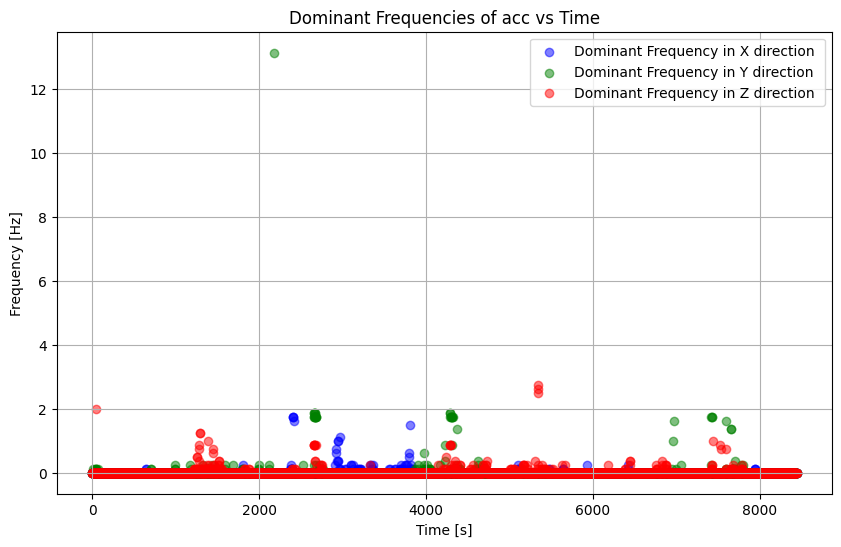

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(t_x, dominant_freq_x, color='blue', alpha=0.5, label='Dominant Frequency in X direction')
plt.scatter(t_y, dominant_freq_y, color='green', alpha=0.5, label='Dominant Frequency in Y direction ')
plt.scatter(t_z, dominant_freq_z, color='red', alpha=0.5, label='Dominant Frequency in Z direction ')


plt.title('Dominant Frequencies of acc vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.grid(True)
plt.legend()
# plt.xlim(837, 1125)
# plt.ylim(0.5, 5)
plt.show()


In [ ]:
for i in range(len(dominant_freq_x)):
    # Check if the current entry exists in array2
    if dominant_freq_1[i] == dominant_freq_x[i]:
        dominant_freq_1[i] = np.nan
    if dominant_freq_2[i] == dominant_freq_x[i]:
        dominant_freq_2[i] = np.nan
    if dominant_freq_3[i] == dominant_freq_x[i]:
        dominant_freq_3[i] = np.nan


In [ ]:
for i in range(len(dominant_freq_y)):
    # Check if the current entry exists in array2
    if dominant_freq_1[i] == dominant_freq_y[i]:
        dominant_freq_1[i] = np.nan
    if dominant_freq_2[i] == dominant_freq_y[i]:
        dominant_freq_2[i] = np.nan
    if dominant_freq_3[i] == dominant_freq_y[i]:
        dominant_freq_3[i] = np.nan


In [ ]:
for i in range(len(dominant_freq_z)):
    # Check if the current entry exists in array2
    if dominant_freq_1[i] == dominant_freq_z[i]:
        dominant_freq_1[i] = np.nan
    if dominant_freq_2[i] == dominant_freq_z[i]:
        dominant_freq_2[i] = np.nan
    if dominant_freq_3[i] == dominant_freq_z[i]:
        dominant_freq_3[i] = np.nan


In [ ]:
num_nan = np.sum(np.isnan(dominant_freq_1))
num_nan

23

In [ ]:
num_nan = np.sum(np.isnan(dominant_freq_2))
num_nan

11

In [ ]:
num_nan = np.sum(np.isnan(dominant_freq_3))
num_nan

12

In [ ]:
import numpy as np

def replace_nan_with_avg(data):
    for i in range(len(data)):
        if np.isnan(data[i]):
            non_nan_values = [x for x in data[max(0, i-8):i] if not np.isnan(x)]
            if non_nan_values:
                data[i] = np.mean(non_nan_values)
            else:
                data[i] = 0  # or any default value if there are no non-NaN values
    return data

dominant_freq_1 = replace_nan_with_avg(dominant_freq_1)
dominant_freq_2 = replace_nan_with_avg(dominant_freq_2)
dominant_freq_3 = replace_nan_with_avg(dominant_freq_3)


In [ ]:
dominant_bpm_1=dominant_freq_1*60
dominant_bpm_2=dominant_freq_2*60
dominant_bpm_3=dominant_freq_3*60


In [ ]:
final_hr = np.zeros(4607)

final_hr[0]=49.6
final_hr[1]=50.3
final_hr[2]=52.7
final_hr[3]=55.6


In [ ]:
dominant_bpm_1.shape

(4607,)

In [ ]:
for i in range(4, len(dominant_bpm_1)):
    if np.abs(final_hr[i-1] - dominant_bpm_1[i]) <= 10:
        final_hr[i] = dominant_bpm_1[i]
    elif np.abs(final_hr[i-1] - dominant_bpm_2[i]) <= 10:
        final_hr[i] = dominant_bpm_2[i]
    elif np.abs(final_hr[i-1] - dominant_bpm_3[i]) <= 10:
        final_hr[i] = dominant_bpm_3[i]
    else:
        final_hr[i] = final_hr[i-1]



In [ ]:
import pandas as pd
data_frame = pd.read_csv('heart_rate.csv', header=None)
data = data_frame.values


In [ ]:
final_hr.size

4607

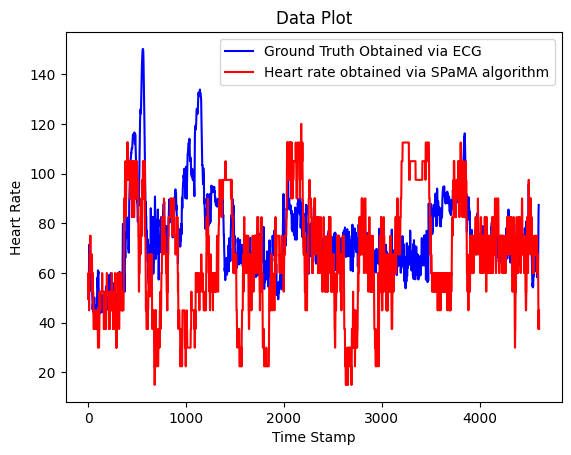

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
data = pd.read_csv('heart_rate.csv', header=None)  # Replace 'your_file.csv' with the path to your CSV file
actual_hr=np.array(data)
# Plot the data
plt.plot(data,color='Blue',label='Ground Truth Obtained via ECG')
plt.plot(final_hr, color='red', label='Heart rate obtained via SPaMA algorithm')

# Customize the plot (optional)
plt.xlabel('Time Stamp')  # Label for the x-axis
plt.ylabel('Heart Rate')  # Label for the y-axis
plt.title('Data Plot')  # Title of the plot
# plt.xlim(0,50)
# Show the plot
plt.legend()
plt.show()


In [ ]:
mean_hr=0
for i in range(0,4603):  # Adjusted the range to avoid index out of range error
    mean_hr += np.abs(final_hr[i])

mean_hr /= 4603
mean_hr


67.01905157175008

In [ ]:
import numpy as np

loss = 0
for i in range(0,4603):  # Adjusted the range to avoid index out of range error
    loss += np.abs(final_hr[i] - actual_hr[i])

loss /= 4603
loss


array([20.26031687])